In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import re
from tqdm import tqdm_notebook, tqdm

Populating the interactive namespace from numpy and matplotlib


In [2]:
# generate random cipher
def randcipher():
    ori = np.arange(26)
    np.random.shuffle(ori)
    cipherbook = {}
    for i in range(26):
        cipherbook[i] = ori[i]
    return cipherbook

alphabet = "abcdefghijklmnopqrstvuwxyz"
alphadict = {}
numdict = {}

for i,a in enumerate(alphabet):
    alphadict[a] = i
    numdict[i] = a
                
class charModel():
    def __init__(self):
        self.pp = np.zeros((26,26))        
        self.p = np.zeros(26)
        self.n = 0
    def update(self,s):
        for i,a in enumerate(s):
            if a not in " 1234567890\n_":
                self.n += 1
                self.p[alphadict[a]] += 1
                if i > 0 and s[i-1] not in " 1234567890\n_":
                    self.pp[alphadict[s[i-1]]][alphadict[a]] += 1
    def getp(self):
        return (self.p+1)/(self.n+26)
        
    def getpp(self):
        return np.asarray([(self.pp[i]+1)/(self.p[i]+26) for i in range(26)])


        
        

In [3]:
# get data
cipherbook = charModel()

filepath = "/Users/hyraland/Projects/pytorch/TF_2_Notebooks_and_Data/06-NLP-and-Text-Data/melville-moby_dick.txt"
corpus = open(filepath, 'r')
for line in corpus.readlines():
    wl = re.sub(r'[^\w\s]','',line)
    wl = wl.lower()
    cipherbook.update(wl)
pdict = cipherbook.getp()
ppdict = cipherbook.getpp()

In [4]:
print(pdict.shape)
print(ppdict.shape)

(26,)
(26, 26)


In [5]:
def encoding(s, cdict):
    c = ""
    for a in s:
        if a in alphadict:
            c+=numdict[cdict[alphadict[a]]]
        else:
            c+=a
    return c
        
def decoding(s, cinvdict):
    c = ""
    for a in s:
        if a in alphadict:
            c+=numdict[cinvdict[alphadict[a]]]
        else:
            c+=a
    return c

def off_spring(oricdict):
    cdict = oricdict.copy()
    swap = [0,0]
    while swap[0]==swap[1]:
        swap = np.random.randint(26,size = 2,)
    temp = cdict[swap[0]]
    cdict[swap[0]] = cdict[swap[1]]
    cdict[swap[1]] = temp
    return cdict

def get_score(guess):
    score = 0
    for i,a in enumerate(guess):
        if a not in " 1234567890\n_" and a != " ":
            if i > 0 and guess[i-1] not in " 1234567890\n_" and guess[i-1] != " ":
                score += np.log(ppdict[alphadict[guess[i-1]]][alphadict[a]])
            else:
                score += np.log(pdict[alphadict[a]])
    return score

In [6]:
original_message = "I then lounged down the street and found, as I expected, that there was a mews in a lane which runs down by one wall of the garden. I lent the ostlers a hand in rubbing down their horses, and received in exchange twopence, a glass of half-and-half, two fills of shag tobacco, and as much information as I could desire about Miss Adler, to say nothing of half a dozen other people in the neighbourhood in whom I was not in the least interested, but whose biographies I was compelled to listen to."
om = re.sub(r'[^\w\s]','',original_message)
om = om.lower()
true_cipher = randcipher()
print(true_cipher)
code = encoding(om, true_cipher)

{0: 24, 1: 16, 2: 20, 3: 18, 4: 2, 5: 14, 6: 1, 7: 9, 8: 25, 9: 15, 10: 22, 11: 5, 12: 17, 13: 3, 14: 21, 15: 6, 16: 23, 17: 7, 18: 19, 19: 0, 20: 4, 21: 11, 22: 13, 23: 8, 24: 12, 25: 10}


In [7]:
print(code)

z ajcd fuldbcs sund ajc tahcca yds oulds yt z cigcvacs ajya ajchc nyt y rcnt zd y fydc njzvj hldt sund qm udc nyff uo ajc byhscd z fcda ajc utafcht y jyds zd hlqqzdb sund ajczh juhtct yds hcvczecs zd civjydbc anugcdvc y bfytt uo jyfoydsjyfo anu ozfft uo tjyb auqyvvu yds yt rlvj zdouhryazud yt z vulfs sctzhc yqula rztt ysfch au tym duajzdb uo jyfo y sukcd uajch gcugfc zd ajc dczbjqulhjuus zd njur z nyt dua zd ajc fcyta zdachctacs qla njutc qzubhygjzct z nyt vurgcffcs au fztacd au


In [8]:
# Genetic Algorithm
N = 20
epoch = 1000
nos = 3
Cipher_pool = [randcipher() for i in range(N)]
evo_score = np.zeros(epoch)

for i in tqdm(range(epoch)):

    offspring = []
    for cipher in Cipher_pool:
        offspring+=[off_spring(cipher) for i in range(nos)]
    Cipher_pool += offspring

    scores = np.zeros(len(Cipher_pool))
    for j, cipher in enumerate(Cipher_pool):
        guess = decoding(code, cipher)
        scores[j] = get_score(guess)
        
    evoargs = np.argsort(scores)[-5:]
    evo_score[i] = np.mean(scores[evoargs])
    newcipher = [Cipher_pool[j] for j in evoargs]
    Cipher_pool = newcipher
    
final_cipher = Cipher_pool[-1]
        
    

100%|██████████| 1000/1000 [00:28<00:00, 35.05it/s]


In [9]:
decode = decoding(code, final_cipher)
print(decode)

i then lounged down the street and found as i expected that there was a mews in a lane which runs down by one wall of the garden i lent the ostlers a hand in rubbing down their horses and received in exchange twopence a glass of halfandhalf two fills of shag tobacco and as much information as i could desire about miss adler to say nothing of half a doken other people in the neighbourhood in whom i was not in the least interested but whose biographies i was compelled to listen to


In [10]:
print(om)

i then lounged down the street and found as i expected that there was a mews in a lane which runs down by one wall of the garden i lent the ostlers a hand in rubbing down their horses and received in exchange twopence a glass of halfandhalf two fills of shag tobacco and as much information as i could desire about miss adler to say nothing of half a dozen other people in the neighbourhood in whom i was not in the least interested but whose biographies i was compelled to listen to


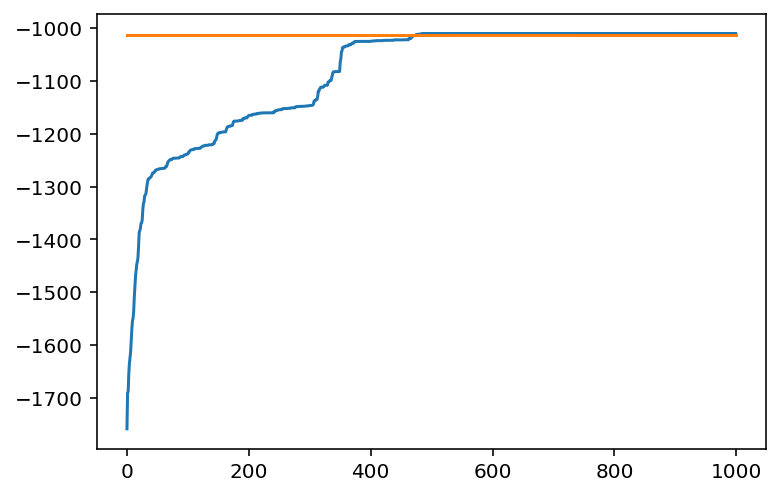

In [11]:
true_score = get_score(om)
plt.plot(evo_score)
plt.plot([true_score]*(len(evo_score)))
plt.show()